In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#We can define variables and do basic operations with them, like you would expect.
x1 = 1
x2 = -2

In [4]:
x1+x2

-1

In [5]:
x1*x2

-2

In [6]:
#The numpy package gives us access to some special functions like exp and sine

In [7]:
np.exp(x1)

2.718281828459045

In [8]:
#Note that the trigonometric functions take radians as arguments
np.sin(np.pi/2)

1.0

In [9]:
#You also have numpy arrays 
myListofNumbers= np.array([1,2,3,4])

In [13]:
#You can add numpy arrays and multiply them by numbers (but not regular arrays)
print(myListofNumbers+myListofNumbers)
print(3*myListofNumbers)

[2 4 6 8]
[ 3  6  9 12]


In [14]:
#Regular arrays act weird, so always use numpy arrays
3*[1,2,3]

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [16]:
#To access the nth item in the array do as follows (indexed from 0 i.e. index 1 is the 2nd element of the list)

myListofNumbers[2]

3

In [22]:
#You can also apply many functiosn to list
np.exp(myListofNumbers)

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [25]:
#You can have arrays with arrays inside them
myListofPoints = np.array( [[1,2,3,4,5,6,7],[2,4,6,8,10,12,14]] )

In [26]:
myListofPoints[0]

array([1, 2, 3, 4, 5, 6, 7])

In [27]:
myListofPoints[0][1]

2

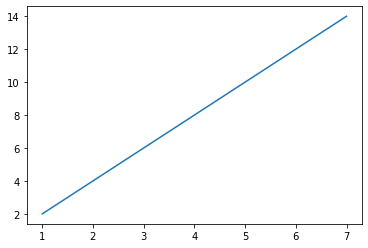

In [28]:
#Now let's look at how to plot things. The simplest way is to simply use pyplot's plot function! 
#You have to enter the x values and y values of your data as two separate arrays

plt.plot(myListofPoints[0], myListofPoints[1])

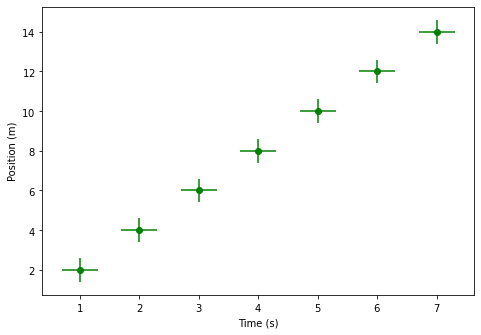

In [53]:
#I usually prefer to work with figures. This way, it is easier to manage making multiple plots at once. You define a figure, 
#Give it axes and then use more or less the same plotting and modifier functions. Here is an example of a fully worked plot below


#Let's also suppose my x values have uncertainties:

dx = [0.3 for x in myListofPoints[0]]
dy = [0.6 for x in myListofPoints[1]]



myFigure = plt.figure()
ax = myFigure.add_axes([0,0,1,1])

ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")

#ls - linestyle (you can do -- for dashed, . for dotted and -. for dash dotted), marker - the style of your marker (you can do star etc.) ). Color is self explanatory
ax.errorbar(myListofPoints[0], myListofPoints[1],xerr = dx, yerr = dy ,ls ='', marker = 'o', color = 'green', label = 'Experimental Data')

#Changes the axes tick label from 1e6 to scientific notation
ax.ticklabel_format(style='sci',useMathText = True)




In [38]:
#Now let's look at how to curve fit!
#For this purpose we can use the curve fit function we imported from scipy.optimize

#First let's define the function we want to optimize:

def linearRel(x,k,b):
    return k*x+b
#Alternatively you could define the same function as

linearRel2 = lambda x,k,b: k*x+b


In [40]:
#Now let's fit the data to this function using curve fit!

#The fitting function can take care of your uncertainties in the y direction too! It even gives you the uncertanties
#in the parameters it calculates
parameters,covmatrix = curve_fit(linearRel,myListofPoints[0], myListofPoints[1], sigma = dy, absolute_sigma = True)

parameterUncertainties = np.sqrt(np.diag(covmatrix))



In [41]:
#The parameters are outputed in the order they appear in our function definition (slope then intercept). In this case
#Intercept is not quite 0, which usually happens. But its a very small number so is ok
print(parameters)

[2.00000000e+00 4.25529134e-09]


In [42]:
#If you have "perfect data", the thing would have a hard time to estimate uncertainty. But this 
print(parameterUncertainties)

[inf inf]


In [54]:
#Let's quickly plot the fitted function on top of the original plot

theActualLinearRel = lambda x: linearRel(x, *parameters)

ax.plot(myListofPoints[0], theActualLinearRel(myListofPoints[0]) ,ls='--',color = 'black', label='Line of Best Fit')

#This inputs the legend using the labels we defined when plotting our graphs
ax.legend()



#You can save the figure as a file. It saves in the same place as 
myFigure.savefig("figname.jpg", bbox_inches='tight', dpi = myFigure.dpi)